# DeepLabV3+ Transfer Learning Inference Demo

DeepLabV3+ with interchangeable backbone transfer learning inference demo
Net pretrained with COCO val2017, then trained with Yamaha-CMU Off-Road Dataset

See: https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/

In [15]:
import os.path as op
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import sys

import matplotlib.pyplot as plt

import torch
import numpy as np
from PIL import Image
import yaml
sys.path.append('H:/Courses/DL_Projects/IS_project/semantic-segmentation/')
from utils import vis_segmentation, display_example_pair, vis_grid_4x3, run_inference

In [3]:
torch.cuda.is_available()

True

In [2]:
np.random.seed(42)

In [16]:
with open('H:/Courses/DL_Projects/IS_project/semantic-segmentation/config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)



Visualize an example pair from the dataset. We will run inference on this image

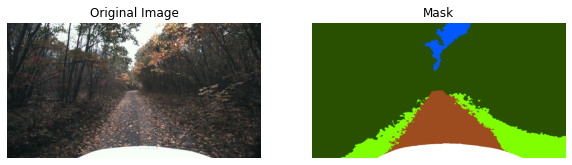

In [17]:
data_path = op.join('H:/Courses/DL_Projects/IS_project/semantic-segmentation/', config['DATA_PATH'])
example_image = Image.open(op.join(data_path, 'train/iid000053/rgb.jpg'))
example_mask = Image.open(op.join(data_path, 'train/iid000053/labels.png'))
image_display = np.array(example_image)
mask_display = np.array(example_mask.convert('RGB'))
display_example_pair(image_display, mask_display)

Load a previously trained model and run the image through it

In [18]:
model = torch.load(op.join('H:/Courses/DL_Projects/IS_project/semantic-segmentation/', config['SAVE_MODEL_PATH']))
model.eval();

In [19]:
predicted_masks = run_inference(model, example_image)

Finally, we take the orginal example image, and using the segmentation map, a custom color map for our labels, and the label names, overlay the segmentation map and create a key for each of the classes

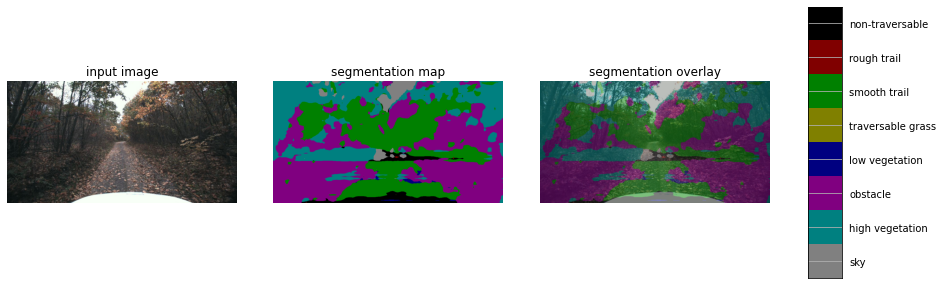

In [20]:
vis_segmentation(example_image, np.array(predicted_masks))

More example output, taken from our paper

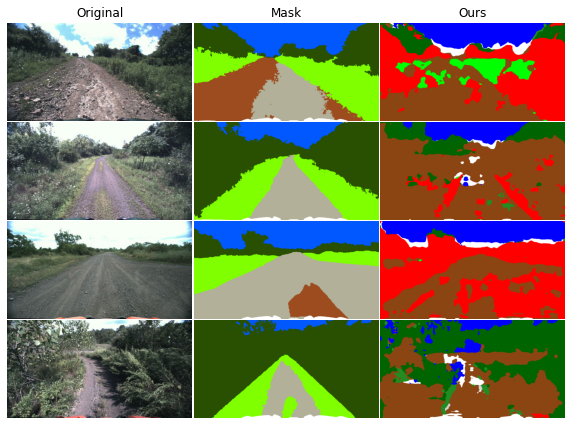

In [21]:
vis_grid_4x3(model, data_path)